<a href="https://colab.research.google.com/github/devgoud2003/Devtern/blob/main/Uber_Trips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the necessary Python libraries and the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("uber-raw-data-sep14.csv")

In [4]:
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
22765,9/18/2014 22:01:00,40.7528,-73.9794,B02512
22766,9/18/2014 22:02:00,40.8937,-74.2189,B02512
22767,9/18/2014 22:06:00,40.7263,-73.9842,B02512
22768,9/18/2014 22:06:00,40.7028,-73.9943,B02512


In [5]:
data["Date/Time"]=data["Date/Time"].map(pd.to_datetime)
data

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
22765,2014-09-18 22:01:00,40.7528,-73.9794,B02512
22766,2014-09-18 22:02:00,40.8937,-74.2189,B02512
22767,2014-09-18 22:06:00,40.7263,-73.9842,B02512
22768,2014-09-18 22:06:00,40.7028,-73.9943,B02512


# prepare the data according to days and hours

In [6]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [7]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
22765,2014-09-18 22:01:00,40.7528,-73.9794,B02512,18,3,22
22766,2014-09-18 22:02:00,40.8937,-74.2189,B02512,18,3,22
22767,2014-09-18 22:06:00,40.7263,-73.9842,B02512,18,3,22
22768,2014-09-18 22:06:00,40.7028,-73.9943,B02512,18,3,22


# look at each day to see on which day the Uber trips were highest

<ipython-input-16-d29b96ca0324>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["day"])


<Axes: xlabel='day', ylabel='Density'>

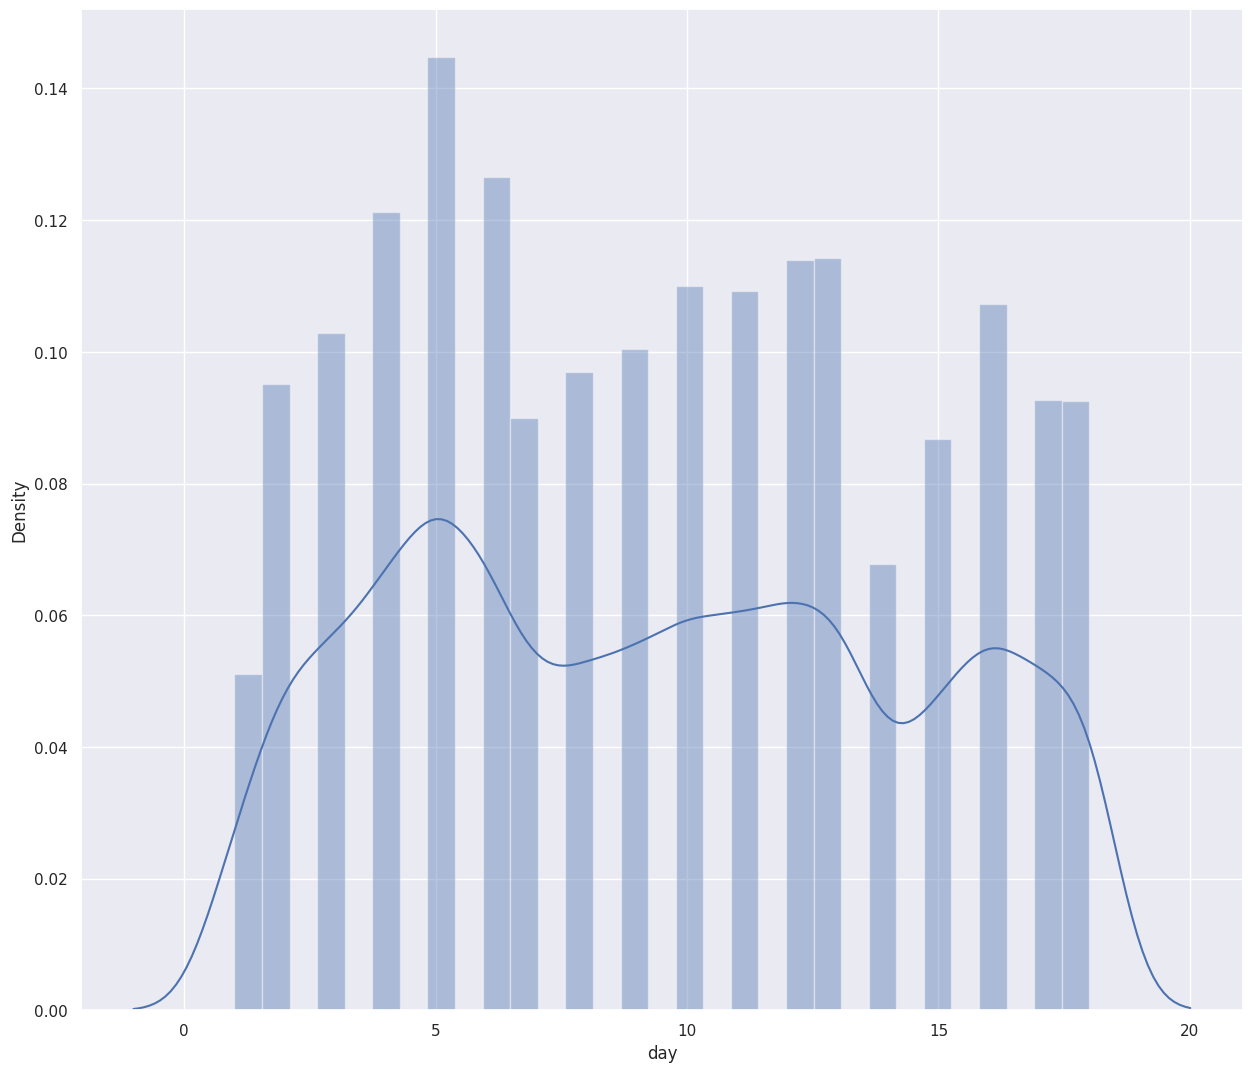

In [16]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(data["day"])


# analyse the Uber trips according to the hours

<ipython-input-9-87e9f10615aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["hour"])


<Axes: xlabel='hour', ylabel='Density'>

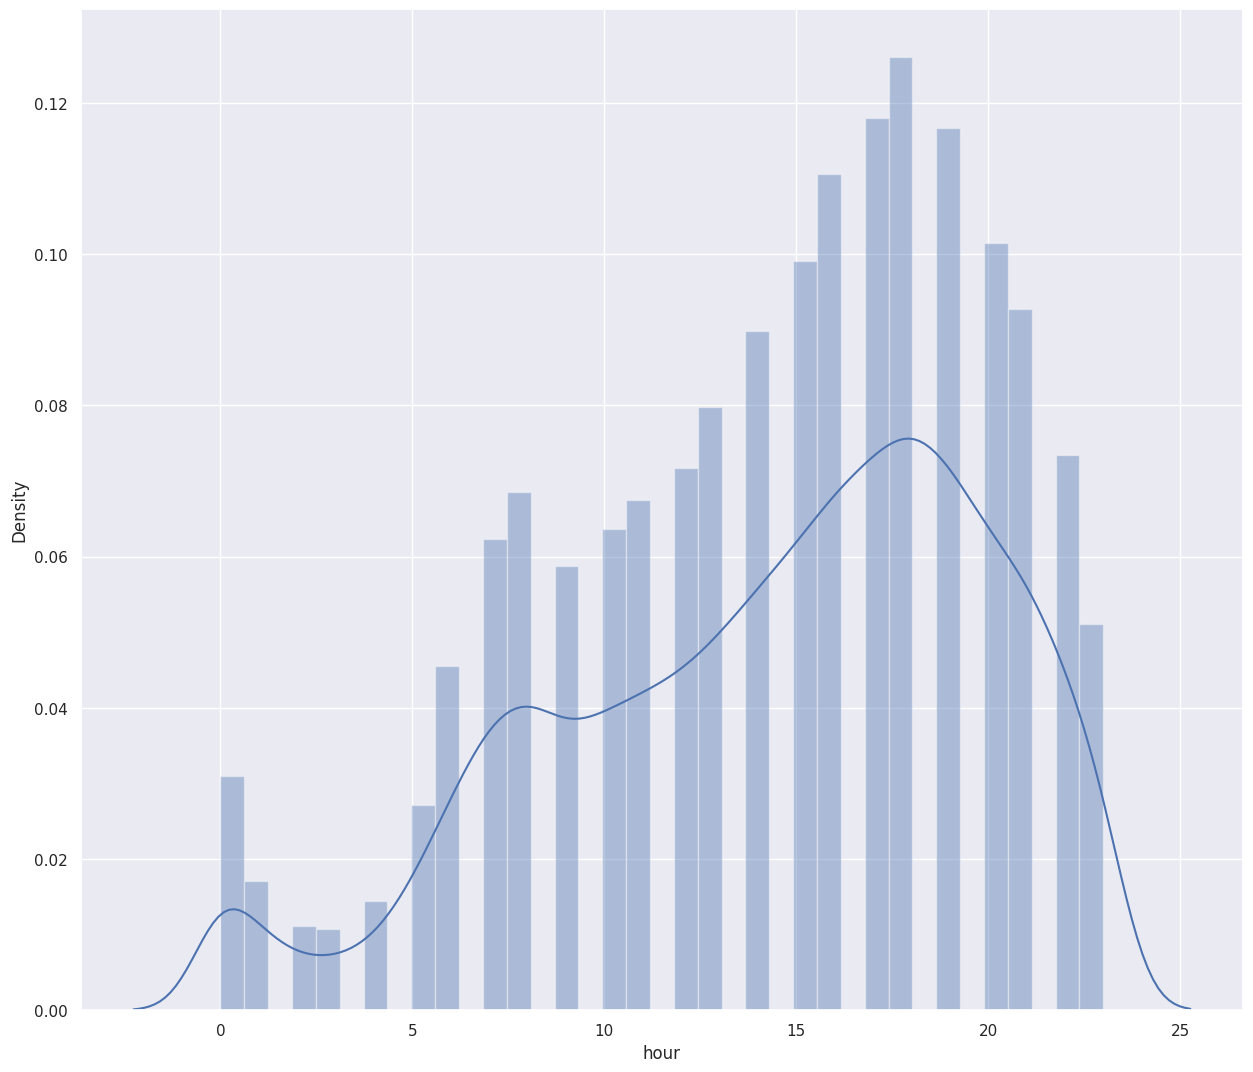

In [9]:
sns.distplot(data["hour"])

# analyse the Uber trips according to the weekdays

<ipython-input-13-25638e14af01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekdays"])


<Axes: xlabel='weekdays', ylabel='Density'>

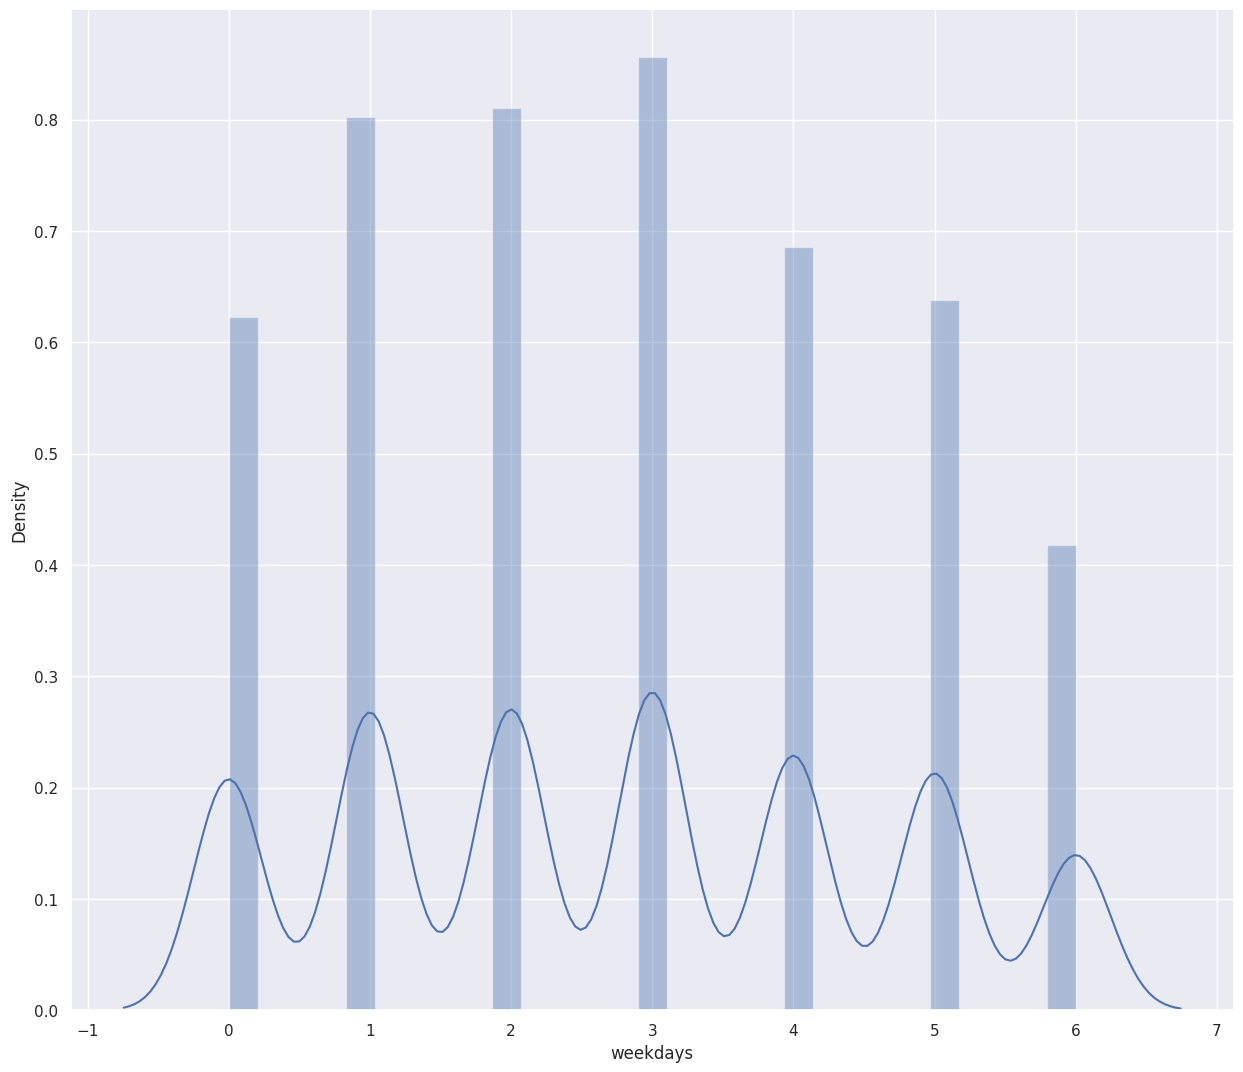

In [13]:
sns.distplot(data["weekdays"])

# look at the correlation of hours and weekdays

<Axes: xlabel='hour', ylabel='weekdays'>

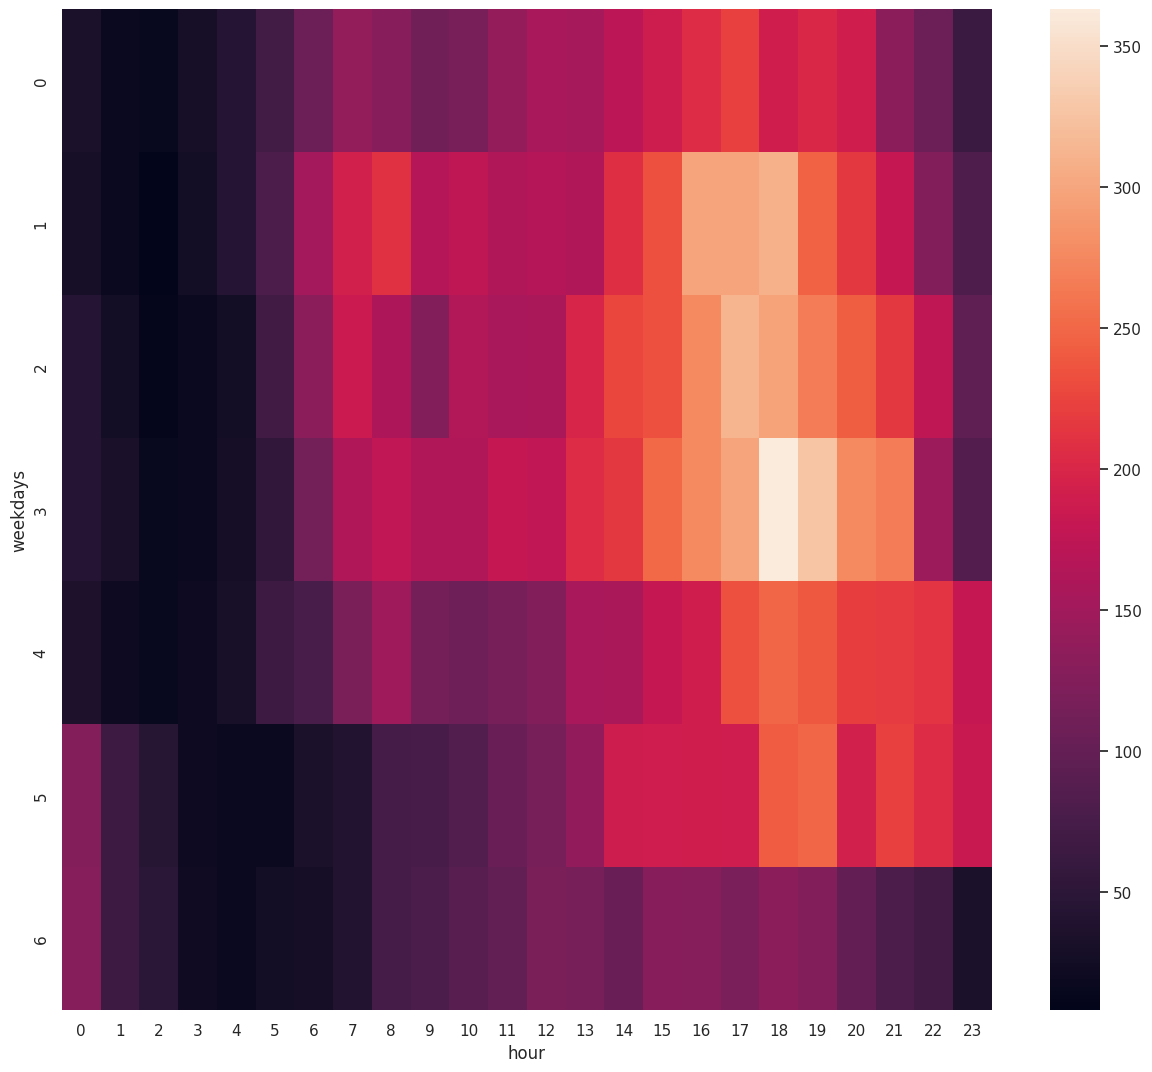

In [11]:
df=data.groupby(["weekdays","hour"]).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

# plot the density of Uber trips according to the regions of the New Your city

<Axes: xlabel='Lon', ylabel='Lat'>

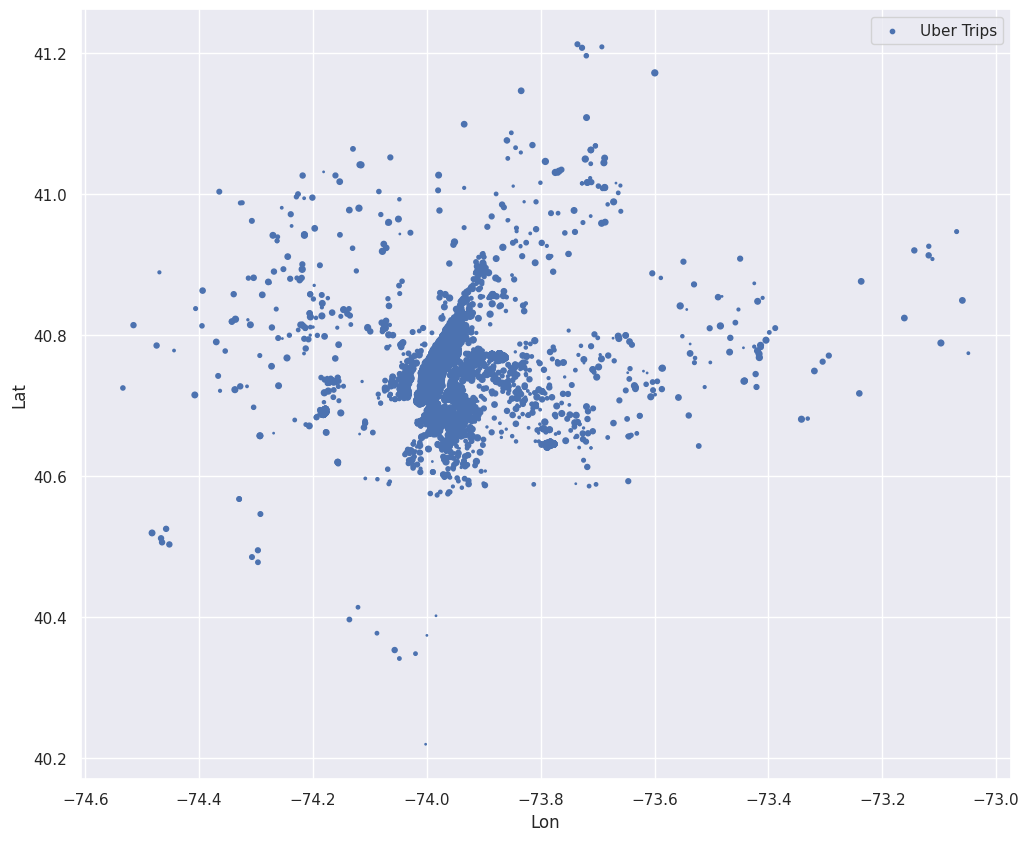

In [12]:
data.plot(kind='scatter',x='Lon', y='Lat', s=data['day'], label='Uber Trips', figsize=(12, 10))